<a href="https://colab.research.google.com/github/rampotter10/Twitter_Sentimental_Analysis/blob/master/Twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter Api Credentials
consumerKey = "               "
consumerSecret = "            "
accessToken = "                  "
accessTokenSecret = "                  "

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) How much can we trust,trust???

2) RT @kumarmit: Alarming to see how much talked, recovery rate has gone down by 10% &amp; No of active cases has doubled in Bihar in just 7 days.…

3) RT @Jai937Bhu: पिछले 5 दिनों में, मानपुर पटवा टोली (गया, बिहार ) में एक कोरोना पॉजिटिव रिपोर्ट और 5 लोगों की संदिग्ध मौत हो गयी है। यहाँ का…

4) RT @anubhavsinha: When you are paid to serve the Government you are a 'Government Servant'. Just making it clear.

5) RT @cprasad111: Over past 5 days, 1 person tested +ve &amp; another 5 are suspected Covid19 deaths. Most families showing symptoms of fever, co…



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"How much can we trust,trust???"
1,"RT @kumarmit: Alarming to see how much talked,..."
2,"RT @Jai937Bhu: पिछले 5 दिनों में, मानपुर पटवा ..."
3,RT @anubhavsinha: When you are paid to serve t...
4,"RT @cprasad111: Over past 5 days, 1 person tes..."


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"How much can we trust,trust???"
1,": Alarming to see how much talked, recovery ra..."
2,"37Bhu: पिछले 5 दिनों में, मानपुर पटवा टोली (गय..."
3,: When you are paid to serve the Government yo...
4,"111: Over past 5 days, 1 person tested +ve &am..."
...,...
94,"1987: ""See, I told you Bihar is not safe for a..."
95,1987: इतना तो हिजड़े भी over excited नहीं होते...
96,371 \nWe want CBI investigation
97,"1987: सभी को नहीं सिर्फ पुरुषों को कहिए, लड़कि..."


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"How much can we trust,trust???",0.200000,0.200000
1,": Alarming to see how much talked, recovery ra...",0.422222,-0.047222
2,"37Bhu: पिछले 5 दिनों में, मानपुर पटवा टोली (गय...",0.000000,0.000000
3,: When you are paid to serve the Government yo...,0.383333,0.100000
4,"111: Over past 5 days, 1 person tested +ve &am...",0.375000,0.125000
...,...,...,...
94,"1987: ""See, I told you Bihar is not safe for a...",0.535714,0.053571
95,1987: इतना तो हिजड़े भी over excited नहीं होते...,0.750000,0.375000
96,371 \nWe want CBI investigation,0.000000,0.000000
97,"1987: सभी को नहीं सिर्फ पुरुषों को कहिए, लड़कि...",0.000000,0.000000


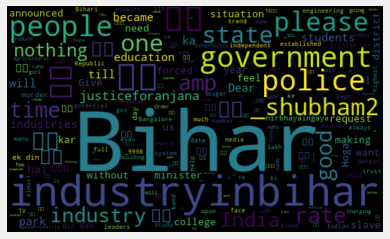

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"How much can we trust,trust???",0.200000,0.200000,Positive
1,": Alarming to see how much talked, recovery ra...",0.422222,-0.047222,Negative
2,"37Bhu: पिछले 5 दिनों में, मानपुर पटवा टोली (गय...",0.000000,0.000000,Neutral
3,: When you are paid to serve the Government yo...,0.383333,0.100000,Positive
4,"111: Over past 5 days, 1 person tested +ve &am...",0.375000,0.125000,Positive
...,...,...,...,...
94,"1987: ""See, I told you Bihar is not safe for a...",0.535714,0.053571,Positive
95,1987: इतना तो हिजड़े भी over excited नहीं होते...,0.750000,0.375000,Positive
96,371 \nWe want CBI investigation,0.000000,0.000000,Neutral
97,"1987: सभी को नहीं सिर्फ पुरुषों को कहिए, लड़कि...",0.000000,0.000000,Neutral


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) How much can we trust,trust???

2) : When you are paid to serve the Government you are a 'Government Servant'. Just making it clear.

3) 111: Over past 5 days, 1 person tested +ve &amp; another 5 are suspected Covid19 deaths. Most families showing symptoms of fever, co…

4) He is man who told us that being from small towns with good vision is not a problem to be in Bollywood industry..Rest in Peace Hero!!!  

5) _shubham2 Haha...

6) _zais: industryinbihar 

Bihar had many sugar producing center,ashok paper mil, joot mil also.
If here is no development so it i…

7) : I will request to Bihar government this high time to do for your people who vote you and working outside Bihar they eagerl…

8) : Bihar has no mineral wealth and it is mainly dependent on agricultural. The land of Bihar is very fertile and it is very…

9) : Ruling government is rule Bihar for 15 years but still Vishnu new industry the migrant workers who are returning to thei…

10) : industryi

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) : Alarming to see how much talked, recovery rate has gone down by 10% &amp; No of active cases has doubled in Bihar in just 7 days.…

2) _uc: CU says that we will always be there for our students during difficult times.
This is the time when students need your help…

3) _9998: Hopefully, our education system is not that weak to not understand that.

Please look into this situation.

promote_all_co…

4) _9998: When IIT Kanpur announced that it would promote all its students amidst the pandemic situation, it was expected that the ot…

5) : A 20 lakh crore relief package had been announced by the government to aid citizens due to the impact of the coronavirus, b…

6) : When Dino James sang,

किसी को नहीं जाना की कित्ती sad है तेरी लाइफ,
यहाँ सिर्फ और सिर्फ रिजल्ट ही बस चलते हैं मेरे भाई 

I…

7) 8471: industryinbihar 

Nothing is changed till .why politician are only remember poor people on the time of election .
…

8) 77042820: industryinbihar dear Susan bab

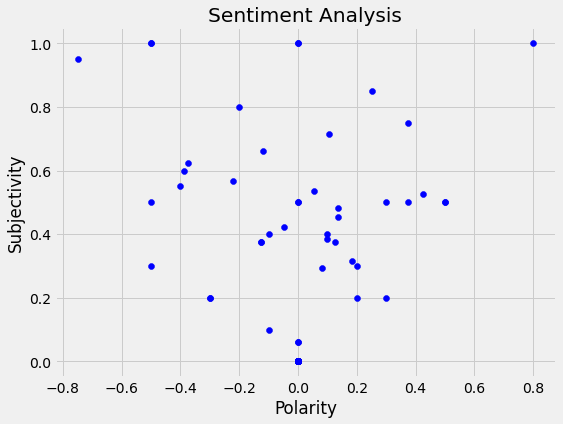

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

20.2

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.2

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     61
Positive    20
Negative    18
Name: Analysis, dtype: int64

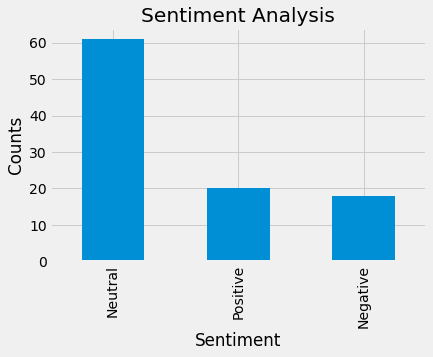

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()